In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing and cleaning

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Tasks/prime.csv")

In [3]:
df.fillna("", inplace=True)

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

#EDA

about data

In [5]:
num_records = len(df)
num_features = len(df.columns)
missing_data = df.isnull().sum().sum()

In [6]:
num_records

8807

In [7]:
num_features

12

In [8]:
missing_data

10

#timeline of contents

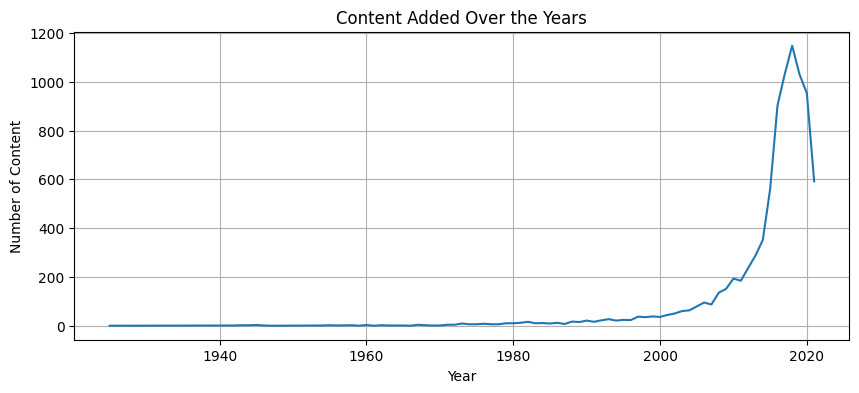

In [9]:
yearly_content_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
plt.plot(yearly_content_counts.index, yearly_content_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Content")
plt.title("Content Added Over the Years")
plt.grid(True)

#content types

Text(0.5, 1.0, 'Distribution of Content Types')

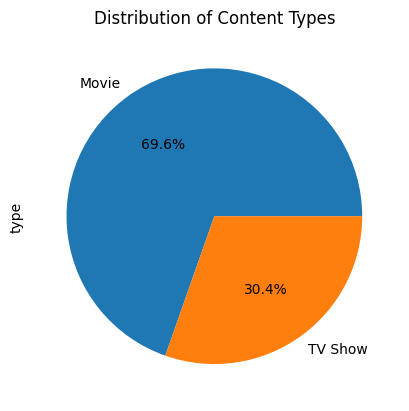

In [10]:
content_type_counts = df['type'].value_counts()
content_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Content Types")

#content distribution by country

Text(0.5, 1.0, 'Top 10 Countries Contributing Content')

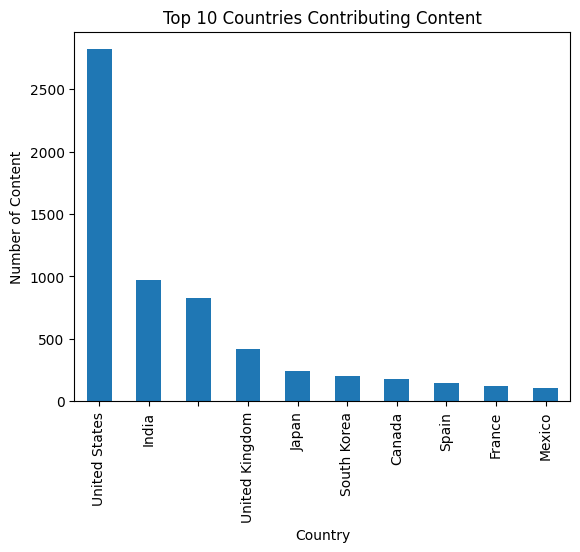

In [11]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Content")
plt.title("Top 10 Countries Contributing Content")

#genre

Text(0.5, 1.0, 'Top 10 Genres')

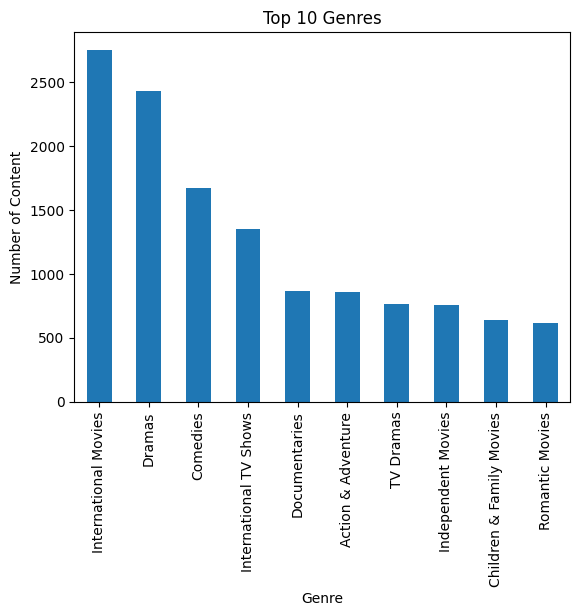

In [13]:
top_genres = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
top_genres.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Number of Content")
plt.title("Top 10 Genres")

#content ratings

Text(0.5, 1.0, 'Distribution of Content Ratings')

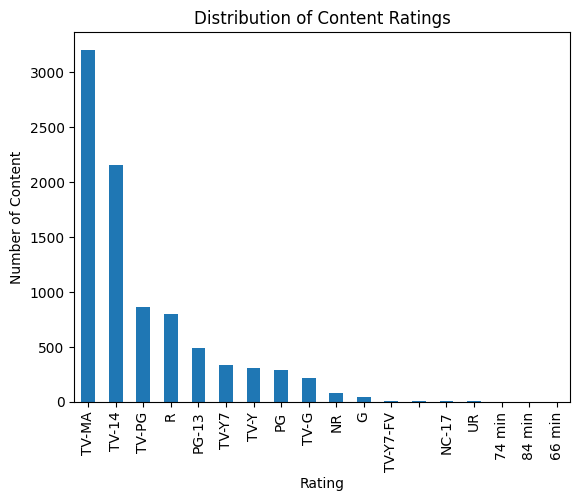

In [14]:
content_ratings = df['rating'].value_counts()
content_ratings.plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Number of Content")
plt.title("Distribution of Content Ratings")

#content duration

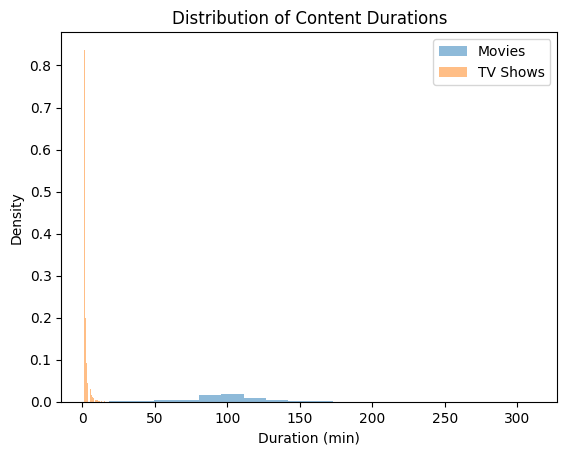

In [15]:
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']
plt.hist(movie_durations, bins=20, alpha=0.5, label='Movies', density=True)
plt.hist(tv_show_durations, bins=20, alpha=0.5, label='TV Shows', density=True)
plt.xlabel("Duration (min)")
plt.ylabel("Density")
plt.title("Distribution of Content Durations")
plt.legend()

#content added over time

Text(0.5, 1.0, 'Content Added Over Time')

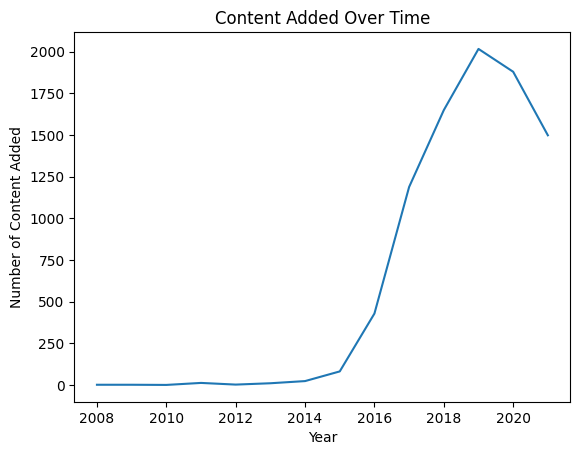

In [16]:
content_added_over_time = df.groupby(df['date_added'].dt.year)['show_id'].count()
content_added_over_time.plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Number of Content Added")
plt.title("Content Added Over Time")

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>